In [1]:
from pylab import *
%matplotlib inline

In [2]:
def deriv_num(func,x_0, h=1e-4):
    return (-func(x_0+2*h)+8*func(x_0+h)-8*func(x_0-h)+func(x_0-2*h))/(12.*h)

In [3]:
def Newton_Raphson(func,x_0, err = 1e-8):
    while abs(func(x_0)) >= err:
        root = x_0 - func(x_0)/deriv_num(func,x_0)
        x_0 = root
    return array(root)

Queremos encontrar las raices de la función
$$ f(<\sigma>) = \sigma - \tanh (\frac{T_c}{T} <\sigma>)$$
con $T_c = \frac{qJ}{k_B }$
resolveremos para $T$ en términos de $ T_c$.

In [32]:
def resta(s):
    return  s - tanh(s / T)

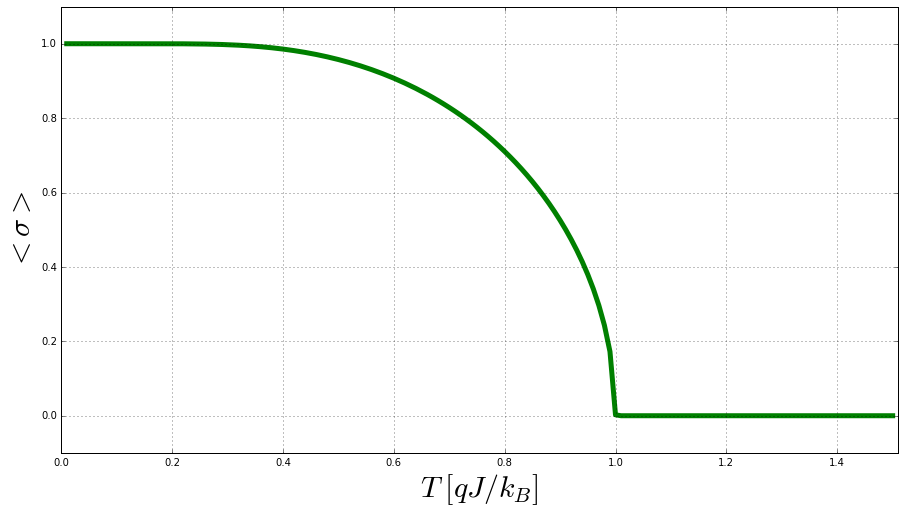

In [34]:
temp = arange(0.01,1.51,.01)
tempe = []
roots = []

fig, ax = plt.subplots(figsize=(15,8))
grid(True)
xlabel(r'$T\; [qJ/k_B]$',fontsize=30),ylabel(r'$<\sigma>$',fontsize = 30)
xlim([0,1.5]), ylim([-.1,1.1])


for i in xrange(len(temp)):
    T = temp[i]     
    tempe.append(T)
    roots.append(Newton_Raphson(resta,.5))
plot(tempe,roots, color = 'g', lw = 5)
show()

Y ahora consideremos un campo magnético $B$, fijando distintas temperaturas debajo y sobre la crítica, entonces queremos las raices de 
$$ f(<\sigma>) = <\sigma> - \tanh \left( \frac{T_c}{T} \left(\frac{B}{B_c} + <\sigma> \right)  \right) $$
e igual que antes, se resolverá en términos de $T_c = \frac{qJ}{k_B} $ y de  $B_c = \frac{\mu}{qJ}$

In [10]:
def resta(s):
    return  s - tanh( (B + s)/ T)

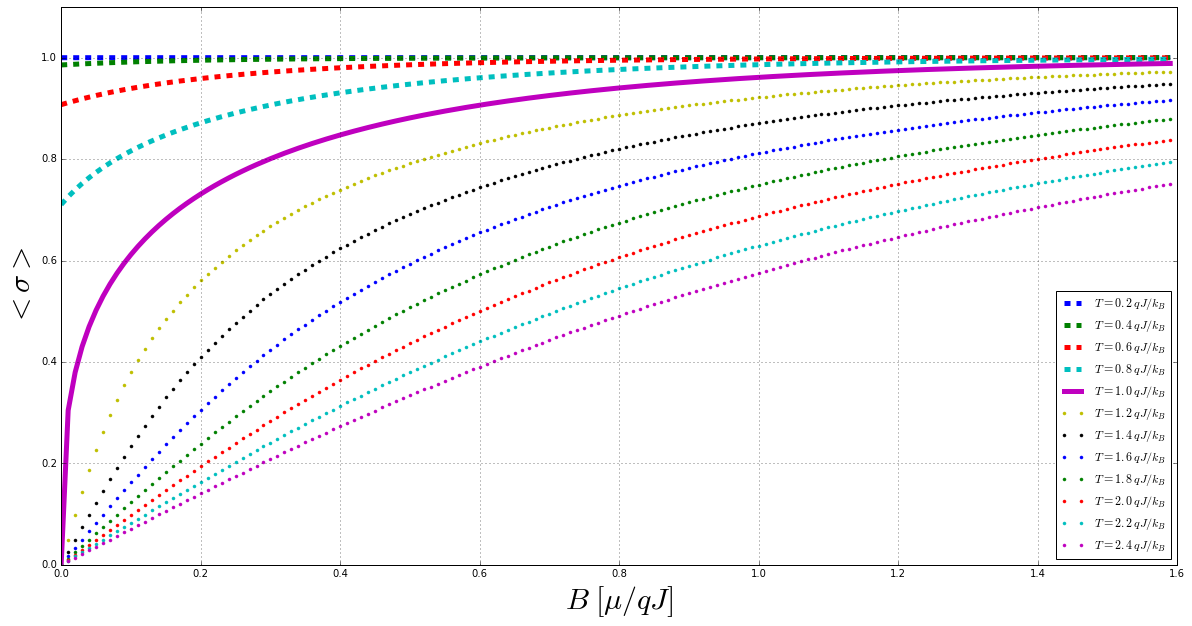

In [31]:
temp = arange(.2,2.6,.2)
magne = arange(0.,1.6,.01)
tempe = []
roots = []

fig, ax = plt.subplots(figsize=(20,10))

for i in xrange(len(temp)):
    T = temp[i]
    tempe.append(T)
    roots = []
    if T < 1:
        for j in xrange(len(magne)):
            B = magne[j]
            roots.append(Newton_Raphson(resta,.5,1e-10))
        ax.plot(magne,roots,'--', lw = 5, label="$T=%s \,qJ/k_B$"%(str(T))   )
        
    elif T == 1:
        for j in xrange(len(magne)):
            B = magne[j]
            roots.append(Newton_Raphson(resta,.5))
        ax.plot(magne,roots, lw = 5, label="$T=%s \,qJ/k_B$"%(str(T))   )
    else:
        for j in xrange(len(magne)):
            B = magne[j]
            roots.append(Newton_Raphson(resta,.5))
        ax.plot(magne,roots, '.',lw = 5, label="$T=%s \,qJ/k_B$"%(str(T))   )
        

ax.legend(loc='lower right')
ax.set_xlabel(r'$B\; [\mu/qJ]$',fontsize=30), 
ax.set_ylabel(r'$<\sigma>$',fontsize = 30)
ax.grid()
ax.set_ylim([0,1.1])
show()